In [1]:
import sys
sys.path.append('../package')
import lostark as lok
import pandas as pd
import numpy as np
import pprint
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = "C:/Users/user/Code_Files_Jupyter/nanum-all/나눔 글꼴/나눔바른고딕/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_columns', None)

In [2]:
df = lok.get_table_df('profile_table')

In [3]:
df.head(2)

,characterCode,expeditionLevel,pvpGradeName,townLevel,title,guildMemberGrade,guildName,usingSkillPoint,totalSkillPoint,지성,담력,매력,친절,serverName,characterName,characterLevel,characterClassName,itemAvgLevel,itemMaxLevel
0,1,300,10단,70.0,None,일반 길드원,릴리움,416,420,656,693,604,553,실리안,그대는노란꽃의민들레다,60,스카우터,1385.00,1385.00
1,2,0,None,NaN,None,None,None,0,0,0,0,0,0,None,졔댜이,1,스페셜리스트,0.00,0.00


In [6]:
for i in range(0, len(df.columns), 20):
    df.iloc[:, i:i+20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570303 entries, 0 to 570302
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   characterCode       570303 non-null  int64  
 1   expeditionLevel     570303 non-null  int64  
 2   pvpGradeName        500807 non-null  object 
 3   townLevel           465906 non-null  float64
 4   title               337168 non-null  object 
 5   guildMemberGrade    303705 non-null  object 
 6   guildName           303704 non-null  object 
 7   usingSkillPoint     570303 non-null  int64  
 8   totalSkillPoint     570303 non-null  int64  
 9   지성                  570303 non-null  int64  
 10  담력                  570303 non-null  int64  
 11  매력                  570303 non-null  int64  
 12  친절                  570303 non-null  int64  
 13  serverName          421827 non-null  object 
 14  characterName       570303 non-null  object 
 15  characterLevel      570303 non-nul

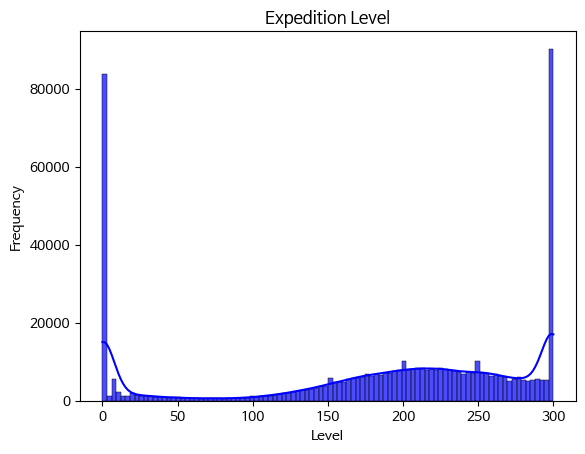

In [33]:
data = df['expeditionLevel']
sns.histplot(data, bins='auto', kde=True, alpha=0.7, color='b')
plt.title('Expedition Level')
plt.xlabel("Level")
plt.ylabel("Frequency")
plt.show()
# 원정대 레벨별 아이템 레벨 구하기

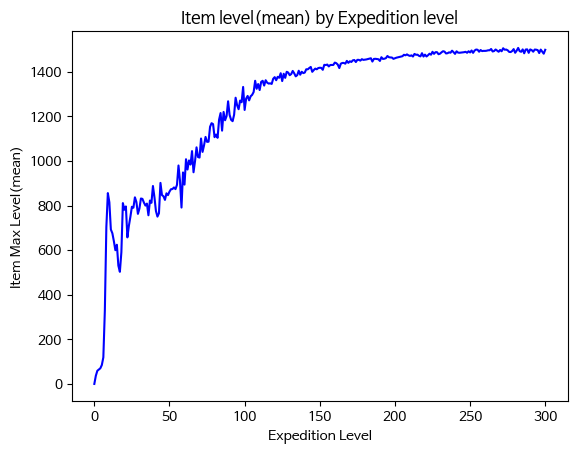

In [30]:
data = df.groupby('expeditionLevel')['itemMaxLevel'].mean()
plt.plot(data.index, data.values, 'b')
plt.title('Item level(mean) by Expedition level')
plt.xlabel('Expedition Level')
plt.ylabel('Item Max Level(mean)')
plt.show()

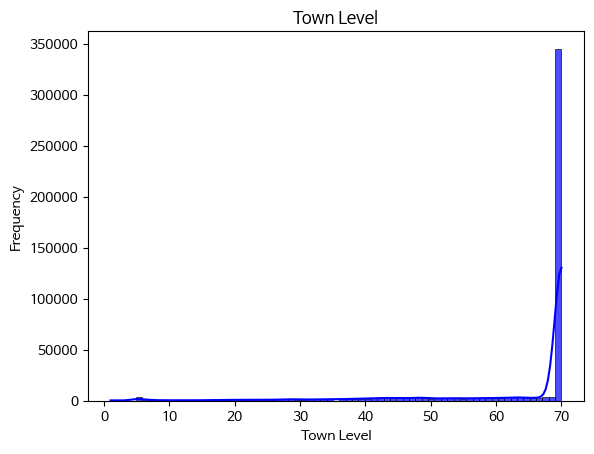

In [32]:
data = df['townLevel']
sns.histplot(data, bins=71, kde=True, alpha=0.7, color='b')
plt.title('Town Level')
plt.xlabel('Town Level')
plt.ylabel('Frequency')
plt.show()

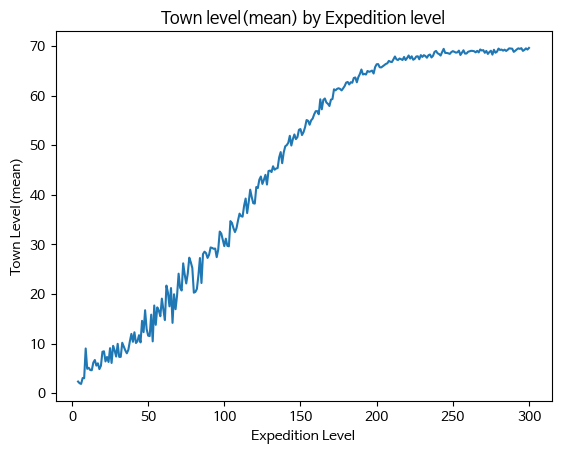

In [31]:
data = df.groupby('expeditionLevel')['townLevel'].mean()
plt.plot(data)
plt.title(f'Town level(mean) by Expedition level')
plt.ylabel('Town Level(mean)')
plt.xlabel('Expedition Level')
plt.show()

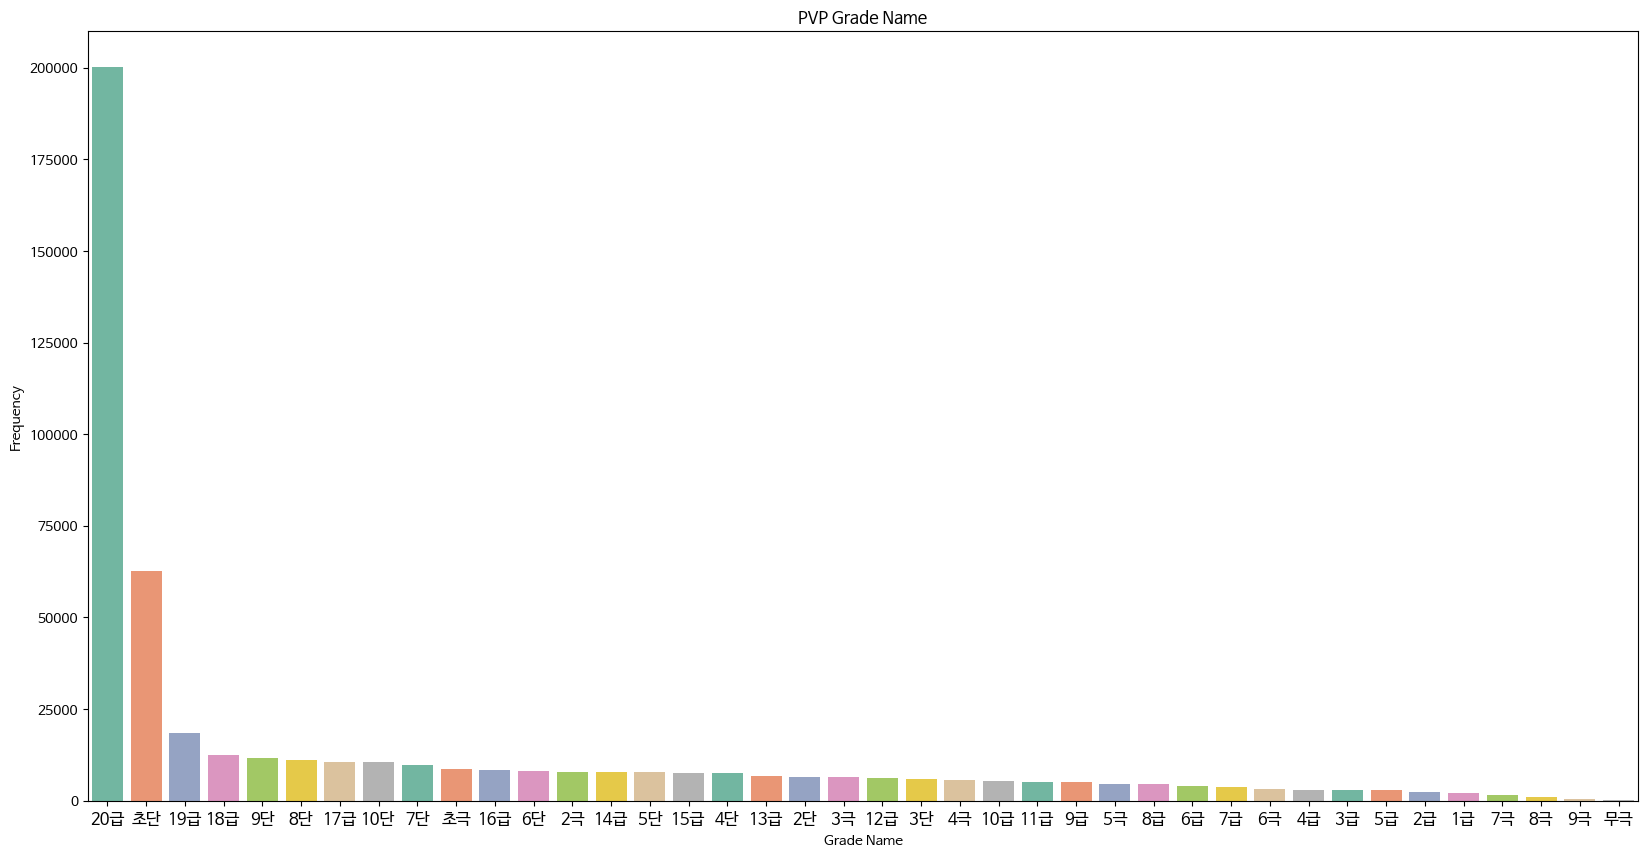

In [43]:
plt.figure(figsize=(20, 10))
data = df['pvpGradeName'].value_counts()
sns.barplot(x=data.index, y=data.values, palette='Set2')
plt.title('PVP Grade Name')
plt.xlabel('Grade Name')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.show()

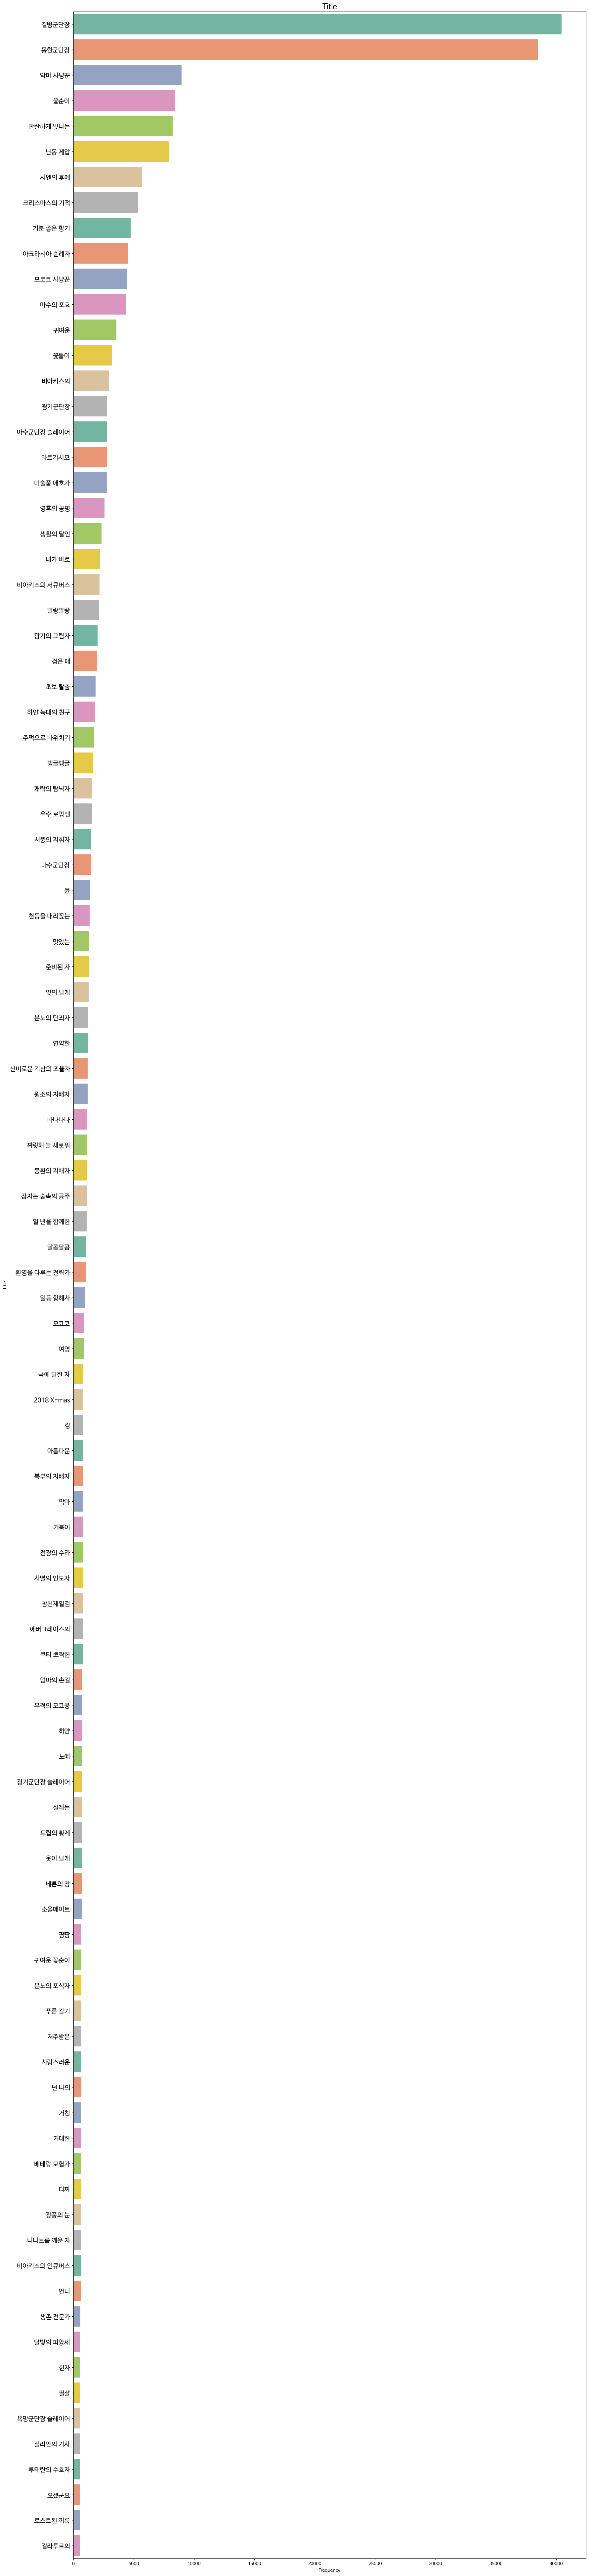

In [59]:
plt.figure(figsize=(20, 100))
data = df['title'].value_counts()[:100]
sns.barplot(y=data.index, x=data.values, palette='Set2', orient='h')
plt.title('Title', fontsize=16)
plt.ylabel('Title')
plt.xlabel('Frequency')
plt.yticks(fontsize=14)
plt.show()

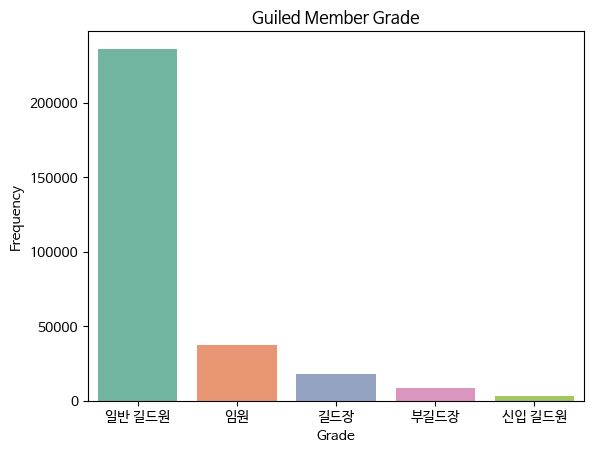

In [64]:
data = df['guildMemberGrade'].value_counts()
sns.barplot(x=data.index, y=data.values, palette='Set2')
plt.title('Guiled Member Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

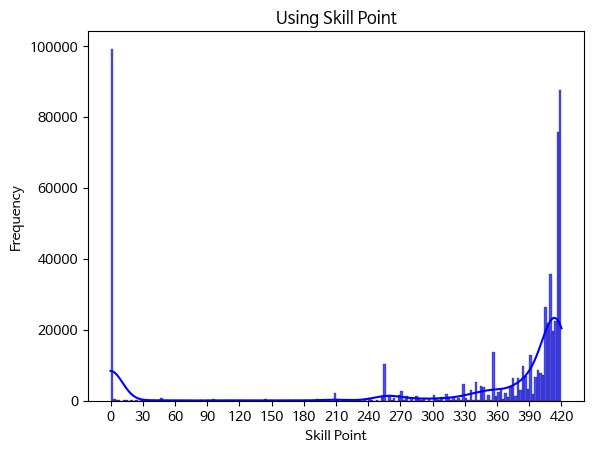

In [79]:
data = df['usingSkillPoint']
sns.histplot(data, bins='auto', kde=True, alpha=0.7, color='b')
plt.title('Using Skill Point')
plt.xlabel('Skill Point')
plt.ylabel('Frequency')
import numpy as np
ticks = np.arange(0, 421, 30)
plt.xticks(ticks)
plt.show()

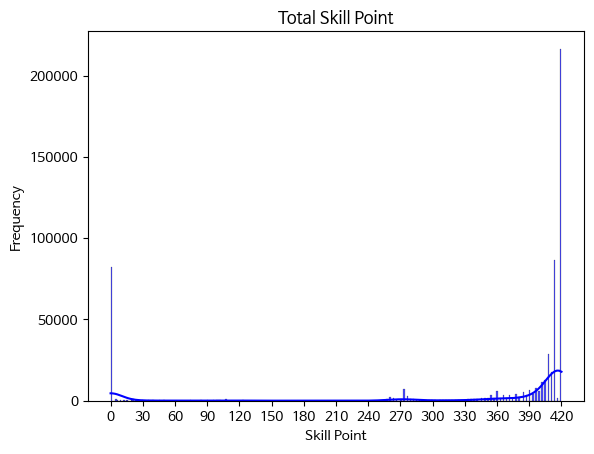

In [82]:
data = df['totalSkillPoint']
sns.histplot(data, bins='auto', kde=True, alpha=0.7, color='b')
plt.title('Total Skill Point')
plt.xlabel('Skill Point')
plt.ylabel('Frequency')
import numpy as np
ticks = np.arange(0, 421, 30)
plt.xticks(ticks)
plt.show()

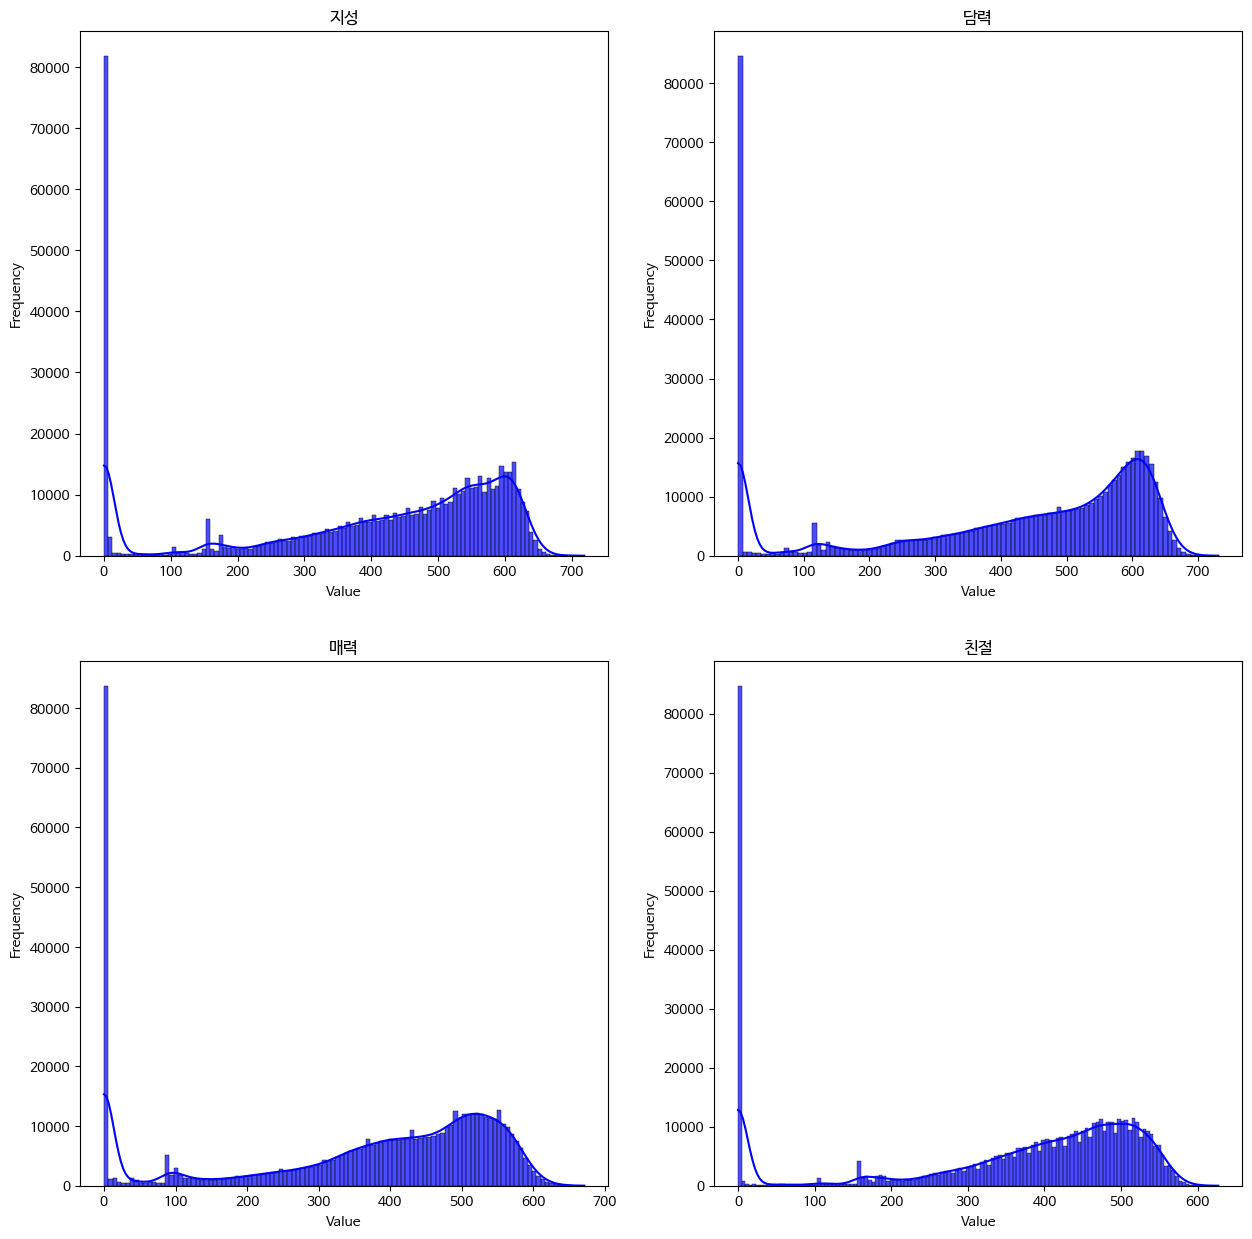

In [89]:
tendencies = ['지성', '담력', '매력', '친절']
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
idx = -1
for i in range(2):
    for j in range(2):
        idx+=1
        data = df[f'{tendencies[idx]}']
        sns.histplot(data, bins='auto', kde=True, alpha=0.7, color='b', ax=ax[i, j])
        ax[i, j].set_title(tendencies[idx])
        ax[i, j].set_xlabel("Value")
        ax[i, j].set_ylabel("Frequency")
plt.show()

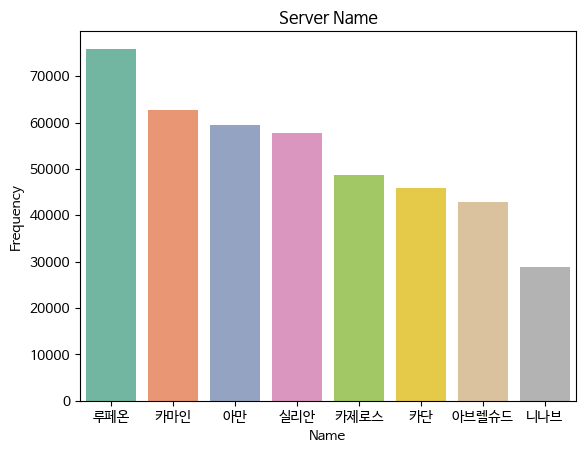

In [91]:
data = df['serverName'].value_counts()
sns.barplot(x=data.index, y=data.values, palette='Set2')
plt.title('Server Name')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.show()

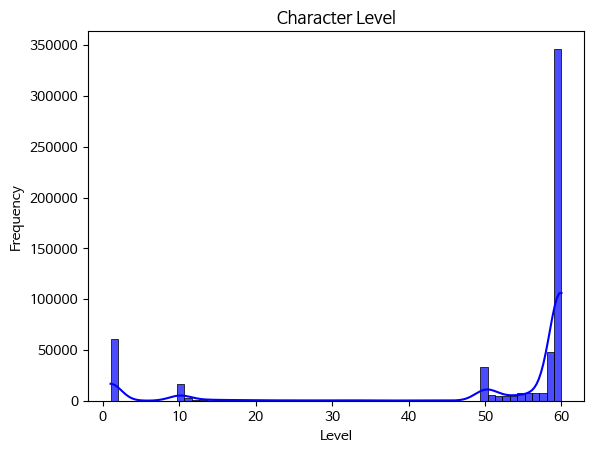

In [97]:
data = df['characterLevel']
sns.histplot(data, bins=61, kde=True, alpha=0.7, color='b')
plt.title('Character Level')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.show()

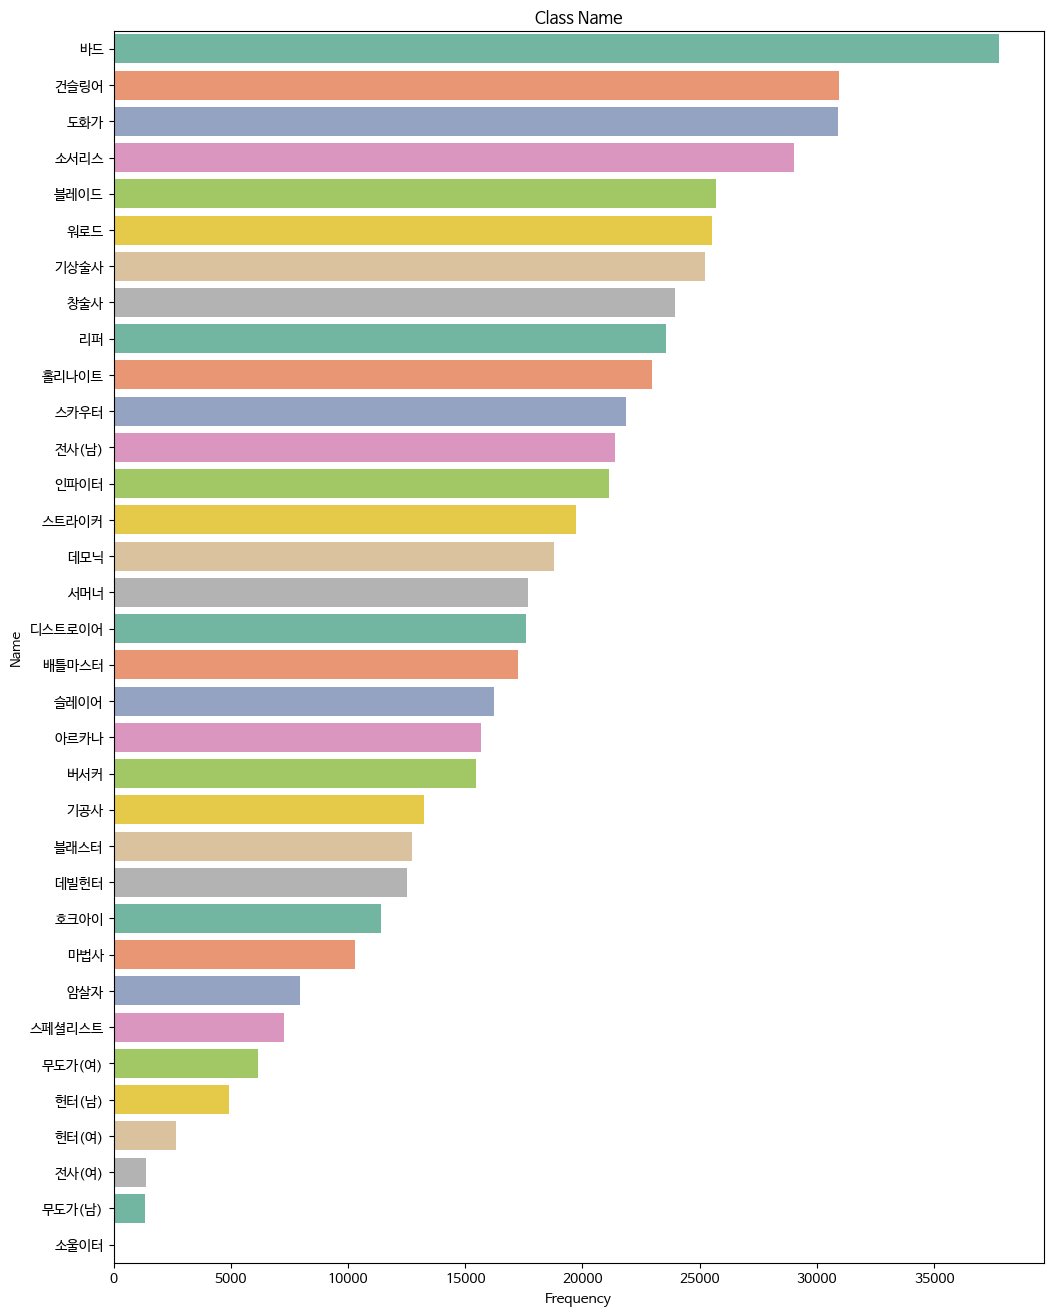

In [99]:
plt.figure(figsize=(12, 16))
data = df['characterClassName'].value_counts()
sns.barplot(y=data.index, x=data.values, palette='Set2', orient='h')
plt.title('Class Name')
plt.ylabel('Name')
plt.xlabel('Frequency')
plt.show()
# 레벨별 직업 분포 => 본캐 비율?

In [3]:
from ipywidgets import interact, widgets
def show_class_distribution_by_item_level(item_level):
    plt.figure(figsize=(12, 8))
    data = df[df['itemMaxLevel'] >= item_level]['characterClassName'].value_counts()
    sns.barplot(y=data.index, x=data.values, palette='Set2', orient='h')
    plt.title(f'Class Distribution(item level >= {item_level})')
    plt.ylabel('Name')
    plt.xlabel('Frequency')
    plt.show()
    
slider = widgets.IntSlider(min=0, max=1650, step=5, value=0, description = "Item Level")
slider.layout.width = '99%'
interact(show_class_distribution_by_item_level, item_level=slider)

interactive(children=(IntSlider(value=0, description='Item Level', layout=Layout(width='99%'), max=1650, step=…

<function __main__.show_class_distribution_by_item_level(item_level)>

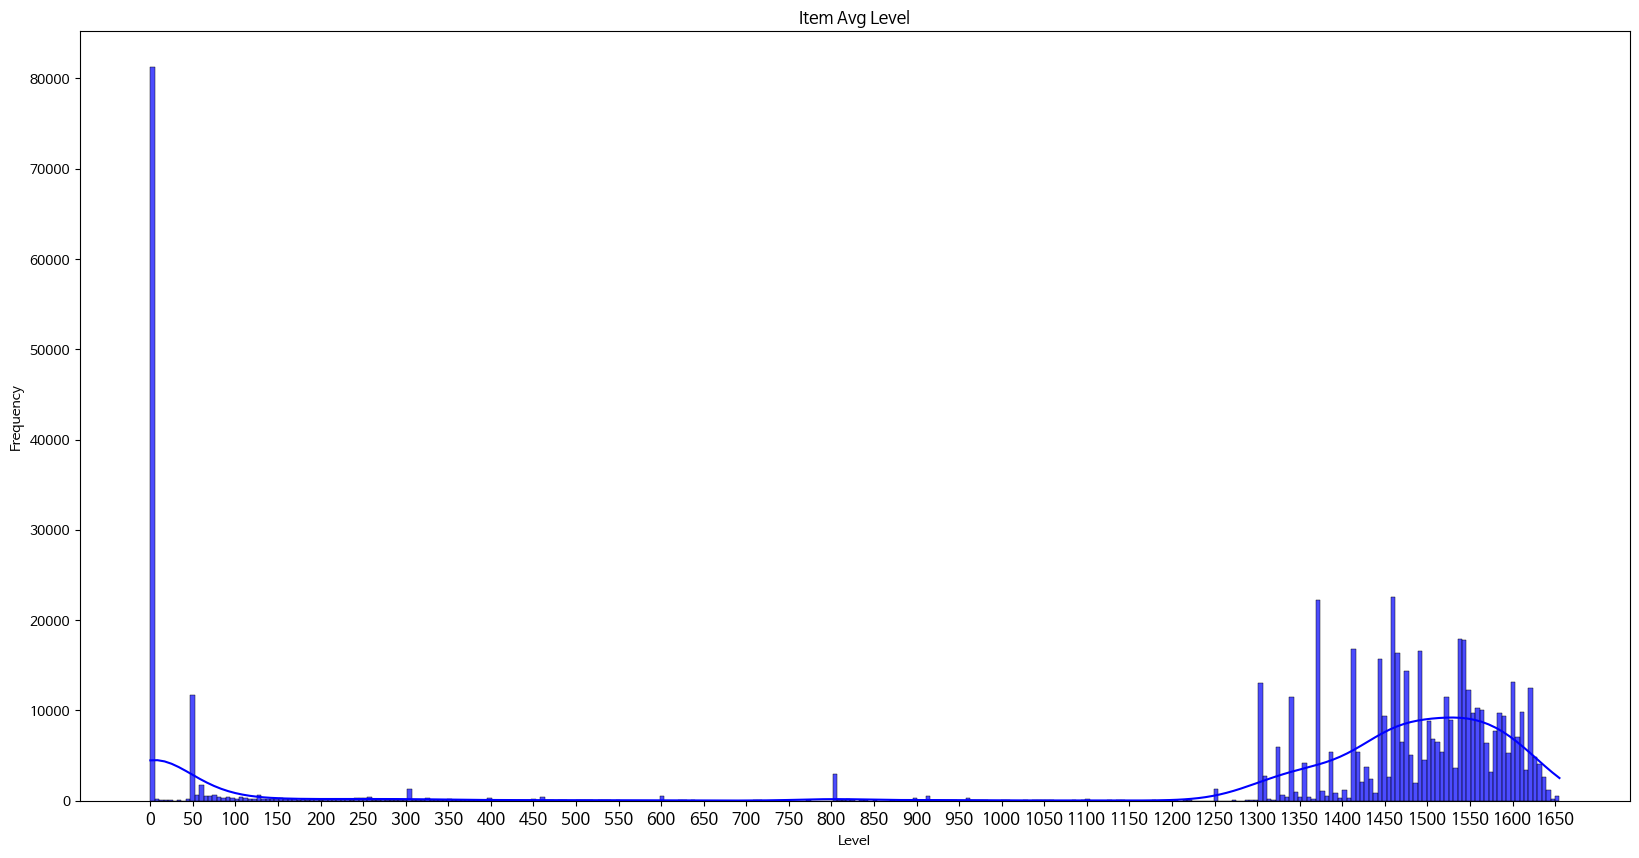

In [108]:
plt.figure(figsize=(20, 10))
data = df['itemAvgLevel']
sns.histplot(data, bins='auto', kde=True, alpha=0.7, color='b')
plt.title('Item Avg Level')
plt.xlabel('Level')
plt.ylabel('Frequency')
ticks = np.arange(0, 1655, 50)
plt.xticks(ticks, fontsize=12)
plt.show()

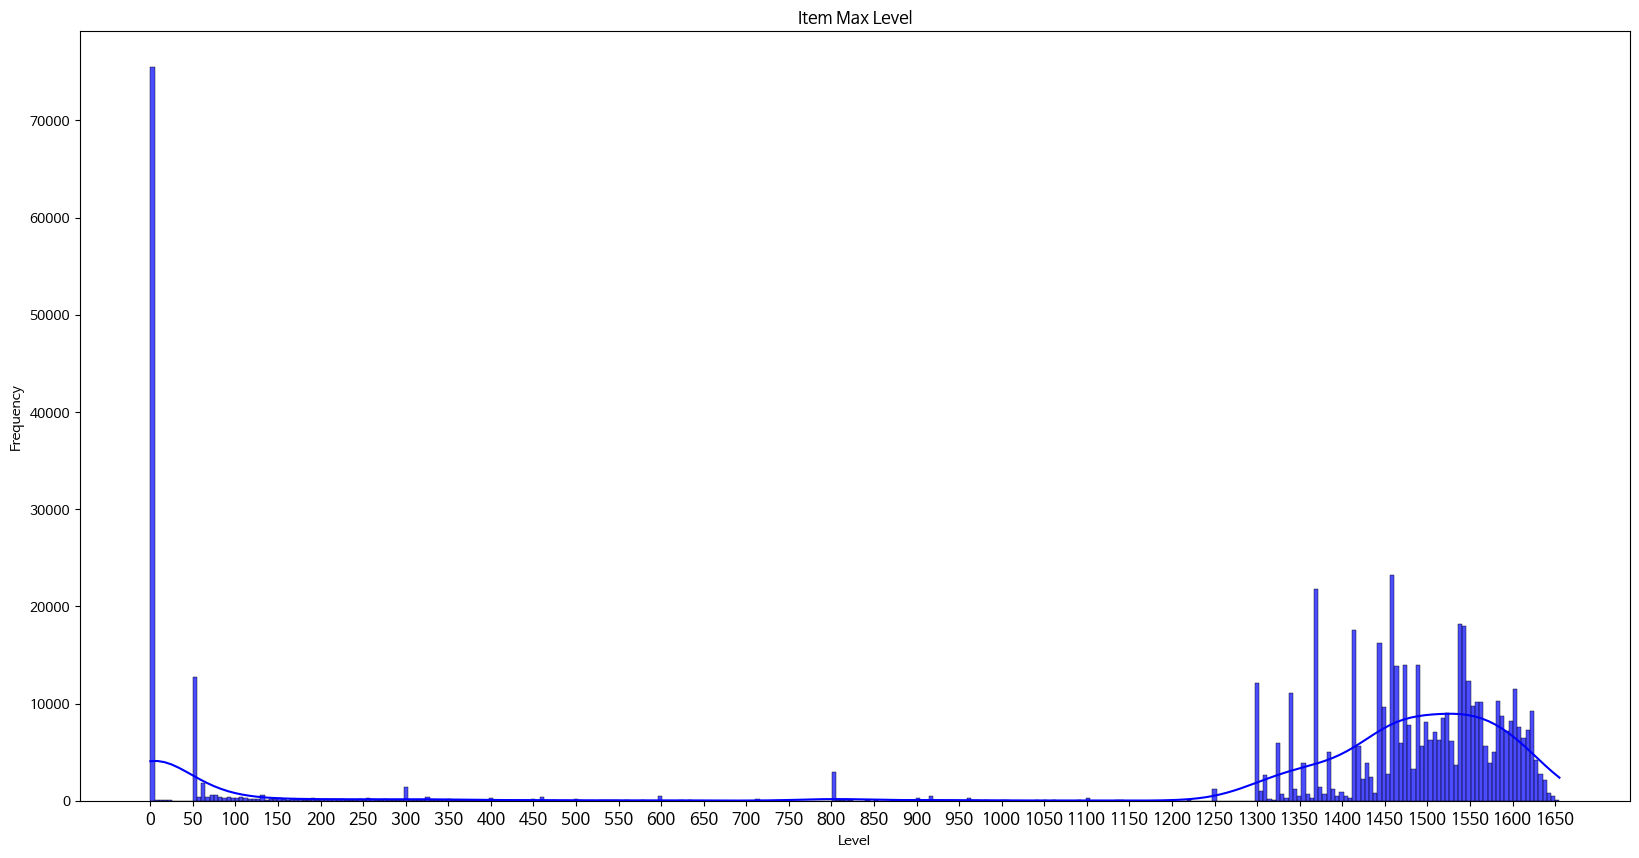

In [109]:
plt.figure(figsize=(20, 10))
data = df['itemMaxLevel']
sns.histplot(data, bins='auto', kde=True, alpha=0.7, color='b')
plt.title('Item Max Level')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.xticks(ticks, fontsize=12)
plt.show()